In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

C:\Users\shrad\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
acq_data = ['Id', 'chan','Name', 'IntRate', 'UnpaidPrinciple', 'LoanDur', 'date_1', 'Payment_one', 'LTV', 'CLTV',
           'Borrow', 'DTI', 'credit_score', 'homeloan','loanreason', 'prop_type', 'No_units', 'status', 'state','address',
           'Mortgage','type','creditscore1', 'Mortgagetype','Mort'];


perf_data = ['Id','month','col3','curintrate','col5','Age','maturity_date','remaining_time','col9','col10','col11','flag','col13',
            'date','lastpaymentdate','closureDate','col17','col18','col19','col20','col21','col22','col23','col24','col25',
            'col26','col27','col28','col29']



In [3]:
processed_acq = pd.read_csv('2000Q1'+'/Acquisition_2000Q1.txt', sep = '|',names = acq_data,index_col=False)
processed_per = pd.read_csv('2000Q1'+'/Performance_2000Q1.txt',sep = '|', names = perf_data, usecols=[0, 15], index_col=False)


In [28]:
processed_per.drop_duplicates(subset='Id', keep='last', inplace=True)
new_data = pd.merge(processed_acq, processed_per, on='Id', how='inner')

#new_data.rename(index=str, columns={"closureDate": 'Default'}, inplace=True)


In [29]:
new_data['closureDate'].fillna(0,inplace=True)
new_data.loc[new_data['closureDate'] != 0, 'closureDate'] = 1
# length =  len(new_data['closureDate'])
# for i in range(0,length):
#     if new_data['closureDate'][i] != 0:
#         new_data['closureDate'][i] = 1

# new_data['closureDate'] = new_data['closureDate'].astype(int)

In [30]:
new_data['dateMonth'] = new_data['date_1'].apply(lambda a: a.split('/')[0].strip()).astype(int)
new_data['dateYear'] = new_data['date_1'].apply(lambda a: a.split('/')[1].strip()).astype(int)

new_data['paymentMonth'] =  new_data['Payment_one'].apply(lambda a: a.split('/')[0].strip()).astype(int)
new_data['paymentYear'] =  new_data['Payment_one'].apply(lambda a: a.split('/')[1].strip()).astype(int)


new_data.drop(['date_1','Payment_one'], axis=1, inplace =True)


In [31]:
print new_data

                  Id chan                                       Name  IntRate  \
0       100007365142    R                    JPMORGAN CHASE BANK, NA    8.000   
1       100007386460    B                    JPMORGAN CHASE BANK, NA    7.875   
2       100011322040    C                               AMTRUST BANK    7.750   
3       100015192562    R                                      OTHER    8.500   
4       100015874399    C                         CITIMORTGAGE, INC.    8.750   
5       100017922445    C                               AMTRUST BANK    8.250   
6       100019048933    C                                      OTHER    7.500   
7       100020205696    R  FIRST TENNESSEE BANK NATIONAL ASSOCIATION    7.625   
8       100021703104    C                    JPMORGAN CHASE BANK, NA    8.000   
9       100023274028    R  FIRST TENNESSEE BANK NATIONAL ASSOCIATION    8.000   
10      100026859568    C  FIRST TENNESSEE BANK NATIONAL ASSOCIATION    8.375   
11      100028993931    R   

In [32]:
new_data.drop(['Mortgage','Mortgagetype','creditscore1','type','Id'], axis=1, inplace=True)
# new_data.drop(['CLTV','LTV'],axis=1,inplace=True)


In [33]:
def getdummies(data):
    col = data.columns[data.isnull().any()]
    new_col = data[col]
    
    
    data.drop(new_col.columns, axis=1, inplace=True)
    objecttype = data.select_dtypes(include=['object'])
    cols = data.drop(objecttype.columns,axis=1)
    
    newdata = pd.DataFrame()
    for i in objecttype.columns:
        temp = pd.get_dummies(objecttype[i],drop_first=True)
        newdata = pd.concat([data,temp],axis=1)
        
    data = pd.concat([cols, newdata, new_col],axis=1).reset_index(drop=True)
    return data
# def getdummies(df):
#     columns = df.columns[df.isnull().any()]
#     nan_cols = df[columns]

#     df.drop(nan_cols.columns, axis=1, inplace=True)

#     cat = df.select_dtypes(include=['object'])
#     num = df.drop(cat.columns, axis=1)

#     data = pd.DataFrame()
#     for i in cat.columns:
#         tmp = pd.get_dummies(cat[i], drop_first=True)
#         data = pd.concat([data, tmp], axis=1)

#     df = pd.concat([num,data,nan_cols], axis=1).reset_index(drop=True)
#     return df

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import sklearn as sk
import matplotlib.pyplot as plt

In [35]:
def random_forest_classifier(features,classification):
    features_train, features_test, classification_train, classification_test = train_test_split(features,classification,test_size=0.25,random_state=0)
    classifier = RandomForestClassifier(n_estimators=200)

    classifier = classifier.fit(features_train,classification_train)
    class_prediction = classifier.predict(features_test)

    x = list(range(len(class_prediction)))

    print class_prediction
    plt.scatter(x,class_prediction,color='red')

    plt.plot(x,classification_test,color='blue')


    plt.xticks(())
    plt.yticks(())
    plt.show()


    print("error mse")
    print(mean_squared_error(classification_test,class_prediction))
    print("variance score: 1 is perfect prediction")
    print(r2_score(classification_test,class_prediction))

    print(classification_report(classification_test,class_prediction))

# features = [[1,3,4,5],[2,67,1,4],[3423,8675,3123,554],[33,67,885,23],[313,367,88512,1223]]

# # classification = [[1],[0],[1],[0]]
# classification = [ 1,0,1,1,1]

# random_forest_classifier(features,classification)

In [36]:
new_val = getdummies(new_data)

In [37]:
print new_val

        IntRate  UnpaidPrinciple  LoanDur  No_units  address dateMonth  \
0         8.000            75000      360         1      173        12   
1         7.875            55000      180         1      208         1   
2         7.750           123000      360         1      630        11   
3         8.500            51000      360         1      316         2   
4         8.750           242000      360         1      335         2   
5         8.250           240000      360         1      483        12   
6         7.500            52000      180         1      347        12   
7         7.625           225000      360         1      980         7   
8         8.000           120000      360         1       63         2   
9         8.000           130000      360         1      300         1   
10        8.375           107000      360         1      633         2   
11        8.000            37000      180         1      286         2   
12        7.875            60000      

In [38]:
# y = new_val['closureDate'].values
# x = new_val.drop(['closureDate'],axis = 1).values


# # features = [[1,3,4,5],[2,67,1,4],[3423,8675,3123,554],[33,67,885,23],[313,367,88512,1223]]

# # # classification = [[1],[0],[1],[0]]
# # classification = [ 1,0,1,1,1]

# # x = [ 1,2]

def run_classfier(data):
    columns = data.columns[data.isnull().any()]
    for each in columns:
        y = data.loc[data[each].notnull(), each].values
        x = data.loc[data[each].notnull()].drop(columns,axis=1).values

        x_test = data.loc[data[each].isnull()].drop(columns,axis=1).values
        if data[each].dtypes == 'object':
            print each 
# random_forest_classifier(x,y)

In [39]:
col=new_val.columns[new_val.isnull().any()]
print col
# new_val['Borrow'] = pd.to_numeric(new_val['Borrow'], errors='coerce')
# new_val['DTI'] = pd.to_numeric(new_val['DTI'], errors='coerce')
# new_val['credit_score'] = pd.to_numeric(new_val['credit_score'], errors='coerce')

# new_val = new_val.dropna(subset=['Borrow'])
# new_val = new_val.dropna(subset=['DTI'])
# new_val = new_val.dropna(subset=['credit_score'])

# new_val['Borrow'] = new_val['Borrow'].astype(int)
# new_val['DTI'] = new_val['DTI'].astype(int)
# new_val['credit_score'] = new_val['credit_score'].astype(int)


Index([u'LTV', u'CLTV', u'Borrow', u'DTI', u'credit_score'], dtype='object')


In [40]:
# y = new_val['closureDate'].values
# x = new_val.drop(['closureDate'],axis = 1).values
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

# print len(x)
# print x
# print new_val['address']
y = new_val['closureDate'].values
y = y.astype('int')
# new_val1 = new_val.drop(['Y','CLTV','TLV'],axis=1, inplace=True)
X = new_val.loc[:,'paymentYear']
# X = new_val.loc[:,new_val.columns != 'closureDate']

# X = new_val.drop(['closureDate'],axis = 1).values
# X = X.astype('int')
# print X
# X = new_val.loc[:, new_val.columns != 'closureDate']


[0 0 0 ..., 0 0 0]


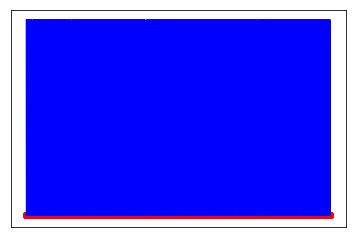

error mse
0.0134324972454
variance score: 1 is perfect prediction
-0.0136153858788
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     60887
          1       0.00      0.00      0.00       829

avg / total       0.97      0.99      0.98     61716



In [41]:
random_forest_classifier(X,y)

In [ ]:
for each in range(0, len(x)):
    print len(x[each])
#         print x[each][i]

In [ ]:
def svm_classifier(features,classification):
    features_train, features_test, classification_train, classification_test = train_test_split(features,classification,test_size=0.25,random_state=0)
    classifier = svm.SVC(kernel='linear',C=1.0,gamma=1)

    classifier = classifier.fit(features_train,classification_train)
#     print(classifier.score(features_train,classification_train))
    class_prediction = classifier.predict(features_test)

    x = list(range(len(class_prediction)))

    print classification_test
    print class_prediction
    plt.scatter(x,class_prediction,color='red')

    plt.plot(x,classification_test,color='blue')


    plt.xticks(())
    plt.yticks(())
    plt.show()


    print("error mse")
    print(mean_squared_error(classification_test,class_prediction))
    print("variance score: 1 is perfect prediction")
    print(r2_score(classification_test,class_prediction))

    print(classification_report(classification_test,class_prediction))

features = [[1,1,4,5],[2,1,1,4],[3423,1,3123,554],[33,1,885,23],[313,1,88512,1223]]

# classification = [[1],[0],[1],[0]]
classification = [ 1,0,1,1,0]

# random_forest_classifier(features,classification)

# logistic_regression(features,classification)



svm_classifier(features,classification)